In [1]:
import json
import logging
from sqlalchemy import Column, Integer, String, Float, DateTime, Boolean, func
from iotfunctions import bif
#import sklearn.external.joblib as extjoblib
import joblib


from iotfunctions.metadata import EntityType
from iotfunctions.db import Database
from iotfunctions.base import BaseTransformer
from iotfunctions.bif import EntityDataGenerator

import datetime as dt
from datetime import datetime

import pandas as pd
import numpy as np

from watson_machine_learning_client import WatsonMachineLearningAPIClient
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import sklearn


ImportError: cannot import name 'joblib' from 'sklearn.externals' (c:\users\a826190\iot-python_v1\lib\site-packages\sklearn\externals\__init__.py)

In [17]:
# set Monitor credentials here and entity type
credentials = {}
with open('/Users/carlos.ferreira1ibm.com/ws/autoai/beta-1_credentials.json', encoding='utf-8') as F:
    credentials = json.loads(F.read())
db = Database(credentials = credentials)
#db_schema = "public" #  set if you are not using the default
db_schema = "BLUADMIN" #  set if you are not using the default
entity_type = 'pump_co'

In [18]:
#Read original pin data
table_name= "IOT_PUMP_CO"
df = db.read_table(table_name=table_name, schema=db_schema)
print(df.describe())

             head       POWER        speed         flow     CURRENT  \
count  323.000000  323.000000   323.000000   323.000000  323.000000   
mean    60.899446   18.784659  1137.969040  1230.901136   32.578483   
std      0.631698    0.211529     4.809957     5.231100    0.247478   
min     58.799000   18.023000  1121.000000  1213.871000   31.970000   
25%     60.778500   18.728000  1137.000000  1227.146500   32.410000   
50%     61.084000   18.843000  1139.000000  1230.911000   32.580000   
75%     61.299000   18.922000  1141.000000  1234.358500   32.760000   
max     61.698000   19.148000  1144.000000  1246.215000   33.190000   

          voltage  
count  323.000000  
mean   434.287926  
std      2.965758  
min    424.000000  
25%    433.000000  
50%    435.000000  
75%    436.000000  
max    439.000000  


In [19]:
# "Drop Duplicates")
print(df.info)
df.drop_duplicates()
print(df.info)

<bound method DataFrame.info of        head           evt_timestamp pump_mode   POWER   speed      flow  \
0    61.073 2020-01-19 04:34:52.950         a  18.900  1140.0  1235.149   
1    61.093 2020-01-19 04:39:52.920         a  18.907  1140.0  1231.443   
2    61.505 2020-01-19 04:44:53.120         a  18.893  1142.0  1229.242   
3    61.033 2020-01-19 04:49:53.220         a  18.833  1139.0  1231.211   
4    61.237 2020-01-19 04:54:53.180         a  18.753  1140.0  1228.130   
..      ...                     ...       ...     ...     ...       ...   
318  58.867 2020-01-20 06:54:59.480         a  18.276  1124.0  1240.579   
319  59.232 2020-01-20 06:59:59.320         a  18.215  1125.0  1230.648   
320  59.134 2020-01-20 07:04:59.390         a  18.202  1124.0  1223.719   
321  59.225 2020-01-20 07:09:59.360         a  18.284  1125.0  1231.015   
322  59.196 2020-01-20 07:14:59.520         a  18.264  1125.0  1235.009   

     CURRENT  voltage devicetype  deviceid       logicalinterface_i

In [20]:
print(df['rcv_timestamp_utc'])

0     2021-04-19 12:42:38.134
1     2021-04-19 12:43:38.188
2     2021-04-19 12:44:38.059
3     2021-04-19 12:45:38.040
4     2021-04-19 12:46:38.107
                ...          
318   2021-04-20 08:04:20.011
319   2021-04-20 08:05:20.052
320   2021-04-20 08:06:20.098
321   2021-04-20 08:07:20.168
322   2021-04-20 08:08:20.084
Name: rcv_timestamp_utc, Length: 323, dtype: datetime64[ns]


In [21]:
# Only run when you needed to export data to another Monitor Tenant
#df['rcv_timestamp_utc'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])
# df['updated_utc'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])
df.to_csv('BackupPumpData.csv')

In [1]:
# Start here when you have existing data on local drive
import json
import logging
from sqlalchemy import Column, Integer, String, Float, DateTime, Boolean, func
from iotfunctions import bif
#import sklearn.external.joblib as extjoblib
import joblib


from iotfunctions.metadata import EntityType
from iotfunctions.db import Database
from iotfunctions.base import BaseTransformer
from iotfunctions.bif import EntityDataGenerator

import datetime as dt
from datetime import datetime

import pandas as pd
import numpy as np

#from watson_machine_learning_client import WatsonMachineLearningAPIClient
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import sklearn

In [2]:
#r_df = pd.read_csv('/Users/carlos.ferreira1ibm.com/ws/predict_delphi/notebooks/Armstrong/data/1096-first-50-hours.csv')
r_df = pd.read_csv('/Users/carlos.ferreira1ibm.com/ws/autoai/data/maximo-auto_ai_pump_data.csv',index_col=False)

In [3]:
print(r_df.describe)

<bound method NDFrame.describe of        Unnamed: 0        rcv_timestamp_utc              updated_utc   speed  \
0             548  2020-08-30 13:35:15.849  2020-08-30 13:35:15.000  1156.0   
1             657  2020-08-30 13:55:15.950  2020-08-30 13:55:15.000  1156.0   
2             874  2020-12-02 14:43:18.176  2020-12-02 14:43:18.000  1154.0   
3            1087  2020-10-13 12:58:20.934  2020-10-13 12:58:20.000  1160.0   
4            1150  2020-04-24 16:59:26.481  2020-04-24 16:59:26.000   971.0   
...           ...                      ...                      ...     ...   
66119      813764  2021-01-30 14:06:10.041  2021-01-30 14:06:10.000  1148.0   
66120      813780  2021-01-30 14:11:09.922  2021-01-30 14:11:09.000  1148.0   
66121      813803  2021-01-30 15:41:10.371  2021-01-30 15:41:10.000  1146.0   
66122      813821  2021-01-30 15:46:10.130  2021-01-30 15:46:10.000  1147.0   
66123      813836  2021-01-30 15:51:10.379  2021-01-30 15:51:10.000  1148.0   

         head    

In [4]:
print(r_df.describe)

<bound method NDFrame.describe of        Unnamed: 0        rcv_timestamp_utc              updated_utc   speed  \
0             548  2020-08-30 13:35:15.849  2020-08-30 13:35:15.000  1156.0   
1             657  2020-08-30 13:55:15.950  2020-08-30 13:55:15.000  1156.0   
2             874  2020-12-02 14:43:18.176  2020-12-02 14:43:18.000  1154.0   
3            1087  2020-10-13 12:58:20.934  2020-10-13 12:58:20.000  1160.0   
4            1150  2020-04-24 16:59:26.481  2020-04-24 16:59:26.000   971.0   
...           ...                      ...                      ...     ...   
66119      813764  2021-01-30 14:06:10.041  2021-01-30 14:06:10.000  1148.0   
66120      813780  2021-01-30 14:11:09.922  2021-01-30 14:11:09.000  1148.0   
66121      813803  2021-01-30 15:41:10.371  2021-01-30 15:41:10.000  1146.0   
66122      813821  2021-01-30 15:46:10.130  2021-01-30 15:46:10.000  1147.0   
66123      813836  2021-01-30 15:51:10.379  2021-01-30 15:51:10.000  1148.0   

         head    

In [5]:
for col in r_df.columns:
    print(col)

Unnamed: 0
rcv_timestamp_utc
updated_utc
speed
head
device_id
pump_mode
flow
voltage
POWER
CURRENT


In [6]:
# Build a model for each Entity in the EntityType
entity_type = 'pump_cp'
entity_type_id = 19305
#entity_name = '04714B601096'
entity_name = '04714B6037F8'
a_df = r_df.loc[r_df['device_id'] == entity_name, :]
print ('a_df.shape 1')
print (a_df.shape)
print (a_df)



a_df.shape 1
(66124, 11)
       Unnamed: 0        rcv_timestamp_utc              updated_utc   speed  \
0             548  2020-08-30 13:35:15.849  2020-08-30 13:35:15.000  1156.0   
1             657  2020-08-30 13:55:15.950  2020-08-30 13:55:15.000  1156.0   
2             874  2020-12-02 14:43:18.176  2020-12-02 14:43:18.000  1154.0   
3            1087  2020-10-13 12:58:20.934  2020-10-13 12:58:20.000  1160.0   
4            1150  2020-04-24 16:59:26.481  2020-04-24 16:59:26.000   971.0   
...           ...                      ...                      ...     ...   
66119      813764  2021-01-30 14:06:10.041  2021-01-30 14:06:10.000  1148.0   
66120      813780  2021-01-30 14:11:09.922  2021-01-30 14:11:09.000  1148.0   
66121      813803  2021-01-30 15:41:10.371  2021-01-30 15:41:10.000  1146.0   
66122      813821  2021-01-30 15:46:10.130  2021-01-30 15:46:10.000  1147.0   
66123      813836  2021-01-30 15:51:10.379  2021-01-30 15:51:10.000  1148.0   

         head     device_i

In [7]:
#drop_cols= ['Unnamed: 0', 'id',  'head','rcv_timestamp_utc', 'warn','kw_hour', 'alarm', 'TIMESTAMP',
#                'pump_mode', 'devicetype', 'deviceid', 'temperature', 'logicalinterface_id', 'eventtype', 'accel_speed',
#                'format', 'vibrations_xaxis', 'vibrations_yaxis', 'vibrations_zaxis', 
#                'rmsn_z', 'rmsn_x', 'rmsn_y', 'rms_x_avg', 'pwr', 'hw_ver', 'dq', 'fw_ver', 'anomaly_score',
#                'accel_power', 'rms_x', 'rms_y','rms_z', 'VERSION', 'run_qty', 'tag_number', 'design_head', 'perf_option', 
#                'design_flow', 'pts_count', 'serial_number', 'firmware_ver', 'reated_power', 'vibration_n_yaxis', 
#                'vibration_n_xaxis', 'vibration_n_zaxis', 'rated_current', 'rated_speed', 'hardware_ver', 'pts']
drop_cols= ['Unnamed: 0']
ac_df = a_df.drop(columns=drop_cols)
for col in ac_df.columns:
    print(col)

rcv_timestamp_utc
updated_utc
speed
head
device_id
pump_mode
flow
voltage
POWER
CURRENT


In [8]:
# Save the data file for tutorial
ac_df.dropna().to_csv('maximo-auto_ai_pump_data.csv', date_format='%Y-%m-%d.%H:%M:%S.%f')

In [9]:
# Check df for NaN in 'POWER','FLOW', 'SPEED', 'HEAD'
#print(e_df.isnull().values.any())

print(ac_df.describe)
    
# Check each column for NaN
print(ac_df['speed'].isnull().sum())
print(ac_df['flow'].isnull().sum())
print(ac_df['voltage'].isnull().sum())
print(ac_df['CURRENT'].isnull().sum())
print(ac_df['POWER'].isnull().sum())
sc_df = ac_df.dropna()
print("Any Nulls")
print(sc_df.isnull().values.any())

<bound method NDFrame.describe of              rcv_timestamp_utc              updated_utc   speed    head  \
0      2020-08-30 13:35:15.849  2020-08-30 13:35:15.000  1156.0  63.958   
1      2020-08-30 13:55:15.950  2020-08-30 13:55:15.000  1156.0  64.075   
2      2020-12-02 14:43:18.176  2020-12-02 14:43:18.000  1154.0  63.882   
3      2020-10-13 12:58:20.934  2020-10-13 12:58:20.000  1160.0  64.694   
4      2020-04-24 16:59:26.481  2020-04-24 16:59:26.000   971.0  45.394   
...                        ...                      ...     ...     ...   
66119  2021-01-30 14:06:10.041  2021-01-30 14:06:10.000  1148.0  63.126   
66120  2021-01-30 14:11:09.922  2021-01-30 14:11:09.000  1148.0  63.155   
66121  2021-01-30 15:41:10.371  2021-01-30 15:41:10.000  1146.0  62.950   
66122  2021-01-30 15:46:10.130  2021-01-30 15:46:10.000  1147.0  62.979   
66123  2021-01-30 15:51:10.379  2021-01-30 15:51:10.000  1148.0  62.941   

          device_id pump_mode      flow  voltage   POWER  CURRENT

In [10]:
print(sc_df.describe)

<bound method NDFrame.describe of              rcv_timestamp_utc              updated_utc   speed    head  \
0      2020-08-30 13:35:15.849  2020-08-30 13:35:15.000  1156.0  63.958   
1      2020-08-30 13:55:15.950  2020-08-30 13:55:15.000  1156.0  64.075   
2      2020-12-02 14:43:18.176  2020-12-02 14:43:18.000  1154.0  63.882   
3      2020-10-13 12:58:20.934  2020-10-13 12:58:20.000  1160.0  64.694   
4      2020-04-24 16:59:26.481  2020-04-24 16:59:26.000   971.0  45.394   
...                        ...                      ...     ...     ...   
66119  2021-01-30 14:06:10.041  2021-01-30 14:06:10.000  1148.0  63.126   
66120  2021-01-30 14:11:09.922  2021-01-30 14:11:09.000  1148.0  63.155   
66121  2021-01-30 15:41:10.371  2021-01-30 15:41:10.000  1146.0  62.950   
66122  2021-01-30 15:46:10.130  2021-01-30 15:46:10.000  1147.0  62.979   
66123  2021-01-30 15:51:10.379  2021-01-30 15:51:10.000  1148.0  62.941   

          device_id pump_mode      flow  voltage   POWER  CURRENT

In [11]:
# Pick input colums to predict power using   'flow', 'speed', 'head'
model_columns = ['speed', 'flow', 'voltage', 'CURRENT','POWER']
for col in sc_df:
    print(col)

# Separate input  (speed, flow, voltage, current) and output x (what you want to predict which is power)
print ("--- x data ---")

x = sc_df.drop(['POWER', 'device_id', 'updated_utc', 'rcv_timestamp_utc', 'pump_mode', 'head'], axis = 1)

print ( x.head() )
print (x.info())
print("x.shape")
print(x.shape)

print ("--- y data ---")
y = sc_df.filter(['POWER'], axis=1)
print (y.head())
print("y.shape")
print(y.shape)
print( y.info() )

s_df = sc_df.loc[sc_df['device_id'] == entity_name, :][model_columns]

print ('s_df.shape 1')
print (s_df.shape)
print (s_df.describe)

# Check df for NaN
print(s_df.isnull().values.any())
print(s_df['speed'].isnull().sum())
print(s_df['flow'].isnull().sum())
print(s_df['voltage'].isnull().sum())
print(s_df['CURRENT'].isnull().sum())
print(s_df['POWER'].isnull().sum())


print(sc_df.isnull().values.any())

rcv_timestamp_utc
updated_utc
speed
head
device_id
pump_mode
flow
voltage
POWER
CURRENT
--- x data ---
    speed      flow  voltage  CURRENT
0  1156.0  1193.607    438.0    32.76
1  1156.0  1203.384    438.0    33.10
2  1154.0  1198.567    431.0    33.26
3  1160.0  1190.626    438.0    33.16
4   971.0   989.633    331.0    26.44
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66124 entries, 0 to 66123
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   speed    66124 non-null  float64
 1   flow     66124 non-null  float64
 2   voltage  66124 non-null  float64
 3   CURRENT  66124 non-null  float64
dtypes: float64(4)
memory usage: 2.5 MB
None
x.shape
(66124, 4)
--- y data ---
    POWER
0  19.316
1  19.366
2  19.224
3  19.452
4  11.471
y.shape
(66124, 1)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66124 entries, 0 to 66123
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -

In [12]:
print(sc_df.describe)

<bound method NDFrame.describe of              rcv_timestamp_utc              updated_utc   speed    head  \
0      2020-08-30 13:35:15.849  2020-08-30 13:35:15.000  1156.0  63.958   
1      2020-08-30 13:55:15.950  2020-08-30 13:55:15.000  1156.0  64.075   
2      2020-12-02 14:43:18.176  2020-12-02 14:43:18.000  1154.0  63.882   
3      2020-10-13 12:58:20.934  2020-10-13 12:58:20.000  1160.0  64.694   
4      2020-04-24 16:59:26.481  2020-04-24 16:59:26.000   971.0  45.394   
...                        ...                      ...     ...     ...   
66119  2021-01-30 14:06:10.041  2021-01-30 14:06:10.000  1148.0  63.126   
66120  2021-01-30 14:11:09.922  2021-01-30 14:11:09.000  1148.0  63.155   
66121  2021-01-30 15:41:10.371  2021-01-30 15:41:10.000  1146.0  62.950   
66122  2021-01-30 15:46:10.130  2021-01-30 15:46:10.000  1147.0  62.979   
66123  2021-01-30 15:51:10.379  2021-01-30 15:51:10.000  1148.0  62.941   

          device_id pump_mode      flow  voltage   POWER  CURRENT

In [13]:
# Split data into train and test
from sklearn.model_selection import train_test_split 
#  Assign variables to capture train and test split  output
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [14]:
# https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py
# 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
 # Validate you are getting good data for a single asset by plotting data
import matplotlib.pyplot as plt

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[0].scatter(pca.transform(X_test), pcr.predict(X_test), alpha=.3,
                label='predictions')
axes[0].set(xlabel='Projected data onto first PCA component',
            ylabel='y', title='PCR / PCA')
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[1].scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3,
                label='predictions')
axes[1].set(xlabel='Projected data onto first PLS component',
            ylabel='y', title='PLS')
axes[1].legend()
plt.tight_layout()
plt.show()

<Figure size 1000x300 with 2 Axes>

In [15]:
# Assess a predictions using Random Forest 
# From Tutorial https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6


# Define the model
#model = ExtraTreesRegressor(n_estimators =1000, min_samples_split =0.5)
random_forest_model = RandomForestRegressor()

print ("y_train")
print (y_train)

# fit the model on the whole dataset
random_forest_model.fit(X_train, y_train.values.ravel() )

# Predict a single row prediction
#--- x data ---
#       SPEED    FLOW  VOLTAGE  CURRENT  POWER
#0    1053.0  16.294  251.0    7.15     1.556
#131  1071.0  61.006  257.0    7.70     1.950
#132  1077.0  69.099  259.0    7.85     2.024
#133  1082.0  78.005  261.0    7.95     2.148
#134  1085.0  80.894  262.0    8.03     2.154

#--- y data ---
# Power should be 2.154

row = [[ 1085.0,  80.894,  262.0,  8.03]]

yhat = random_forest_model.predict(row)
print("Power should be 2.154")
print(yhat)

# Predict entire training set
x_pos_predictions = random_forest_model.predict(X_test)

print("Predictions")
print ( x_pos_predictions )
print( x_pos_predictions.shape)

# Add the prediction to the dataframe
#s_df['predict_x1_position'] = x_pos_predictions 

y_train
        POWER
46846  19.604
65155  18.436
52150  19.294
28705  18.494
61397  18.443
...       ...
37194  19.231
6265   18.875
54886  19.044
860    18.790
15795  16.408

[52899 rows x 1 columns]
Power should be 2.154
[12.9042]
Predictions
[19.2655 18.8726 18.6024 ... 19.25   19.0008 18.8868]
(13225,)


In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13225 entries, 39488 to 4779
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   speed    13225 non-null  float64
 1   flow     13225 non-null  float64
 2   voltage  13225 non-null  float64
 3   CURRENT  13225 non-null  float64
dtypes: float64(4)
memory usage: 516.6 KB


Score: 0.9997949737071588


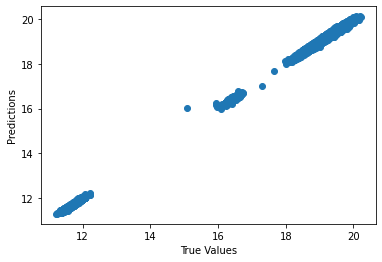

In [17]:
## Plot the prediction The line / model
plt.scatter(y_test, x_pos_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print('Score:', random_forest_model.score(X_test, y_test) )

In [18]:
# Import metrics library
from sklearn import metrics
print("MAE")
print(metrics.mean_absolute_error(y_test, x_pos_predictions))
print("MSE")
print(metrics.mean_squared_error(y_test, x_pos_predictions))
print("RMSE")
print(np.sqrt(metrics.mean_squared_error(y_test, x_pos_predictions)))

MAE
0.03439337261079605
MSE
0.002039674739541761
RMSE
0.045162758325214825


In [19]:
# Check df for NaN
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
columns = [ 'speed','flow','voltage','CURRENT','POWER', 'device_id','updated_utc']
s_df = ac_df.loc[ac_df['device_id'] == entity_name, :][columns]

print ("s_df.shape")
print (s_df.shape)
s_df.head()

s_df.shape
(66124, 7)


,speed,flow,voltage,CURRENT,POWER,device_id,updated_utc
0,1156.0,1193.607,438.0,32.76,19.316,04714B6037F8,2020-08-30 13:35:15.000
1,1156.0,1203.384,438.0,33.10,19.366,04714B6037F8,2020-08-30 13:55:15.000
2,1154.0,1198.567,431.0,33.26,19.224,04714B6037F8,2020-12-02 14:43:18.000
3,1160.0,1190.626,438.0,33.16,19.452,04714B6037F8,2020-10-13 12:58:20.000
4,971.0,989.633,331.0,26.44,11.471,04714B6037F8,2020-04-24 16:59:26.000


In [20]:
# save the model to disk
import pickle
model_file_path = '/Users/carlos.ferreira1ibm.com/ws/autoai/models/power_random_forest.mod'
pickle.dump(random_forest_model, open(model_file_path, 'wb'))

# Load the model from disk
model = pickle.load(open(model_file_path, 'rb'))
print(model)

# Test prediction on  a single row prediction
# speed      flow  voltage  CURRENT   POWER
# 1160.0  1190.626    438.0    33.16  19.452
#  971.0   989.633    331.0    26.44  11.471

# Power should be 19.452
row = [[1160.0, 1190.626, 438.0, 33.16]]

yhat = model.predict(row)
print(yhat)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
[19.4487]


In [21]:
# Get Connection to DB to save and retreive models
from iotfunctions.db import Database
import json
credentials = {}
credential_file = '/Users/carlos.ferreira1ibm.com/ws/autoai/beta-1_credentials.json'

with open(credential_file, encoding='utf-8') as F:
    credentials = json.loads(F.read())
db_ctp = Database(credentials=credentials, entity_type_id=entity_type_id )
print(entity_type_id)
print (db_ctp.tenant_id)


# Store the model with Datetimestamp and vector to DB db_ctp
from datetime import datetime
model_name = 'power_random_forest.mod'
try:
    feature_vector = ['speed', 'flow', 'voltage', 'CURRENT' ]
    model_dict  = {
    'model': model,
    'feature_vector': feature_vector,
    'timesstamp' : datetime.now().strftime("%Y%m%d%H%M%S")
    }
    db_ctp.model_store.store_model(model_name, model_dict) 
    print("Saved Model %s" %model_name)
except Exception as e:
    print('Model store failed with ' + str(e))
    pass


# Retrieve the model from db
try:
    model_dict = db_ctp.model_store.retrieve_model(model_name)
    print('load model')
    monitor_model = model_dict['model']
    print(monitor_model)
    feature_vector = model_dict['feature_vector']
    print(feature_vector)
    feature_vector = model_dict['timesstamp']
    print(feature_vector)
except Exception as e:
    print('Model retrieval failed with ' + str(e))
    pass

/Users/carlos.ferreira1ibm.com/ws/autoai/beta-1_credentials.json
19305
beta-1
Saved Model power_random_forest.mod
load model
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
['speed', 'flow', 'voltage', 'CURRENT']
20210421130410


In [22]:
# Test prediction on  a single row prediction
# speed      flow  voltage  CURRENT   POWER
# 1160.0  1190.626    438.0    33.16  19.452
#  971.0   989.633    331.0    26.44  11.471

# Power should be 19.452
row = [[1160.0, 1190.626, 438.0, 33.16]]

yhat = model.predict(row)
print(yhat)

[19.4487]


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Sort the dataframe by updated_utc
d_df = sc_df
d_df['datetime'] = pd.to_datetime(d_df['updated_utc'])
d_df = d_df.set_index('datetime')
#d_df.drop(['updated_utc'], axis=1, inplace=True)

d_df.head()



In [ ]:
print(d_df.index)
print(d_df.tail(10))

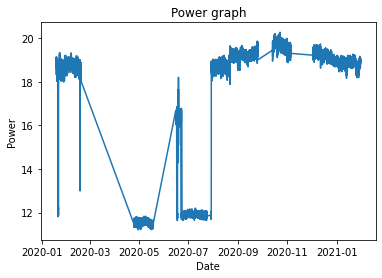

In [107]:
plt.xlabel("Date")
plt.ylabel("Power")
plt.title("Power graph")
plt.plot(d_df.sort_values(by='datetime',ascending=True)['POWER'])

In [108]:
#Select rows = or less than 0 and drop them
print(d_df.loc[d_df.POWER <= 0])


Empty DataFrame
Columns: [speed, flow, voltage, CURRENT, POWER, device_id, updated_utc, power_prediction]
Index: []


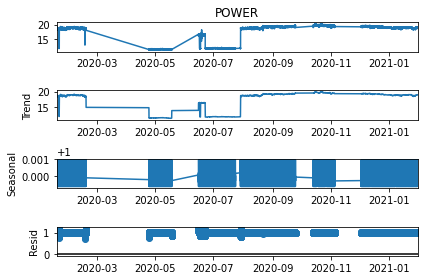

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose
d_df = d_df.dropna()
result = seasonal_decompose(d_df[d_df.POWER > 0] .sort_values(by='datetime',ascending=True)['POWER'], model='multiplicative', freq=60)
result.plot()
plt.show()